<a href="https://colab.research.google.com/github/Suchi024/Customer-Churn-Prediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 01: Defining the problem
#Objective: Predict whether a customer will churn based on various factors.
#Target Variable: Churn (binary: Yes or No).
#Features: Demographic info, service usage, etc.

In [2]:
#Step 02: Data Collection
#Telecom Churn Dataset

In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

In [6]:
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


In [9]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset (replace with your actual file path)
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

# Print the column names to verify
print(df.columns)

# Create a contingency table for 'Contract' and 'Churn'
contingency_table = pd.crosstab(df['Contract'], df['Churn'])  # Change 'Churn_Yes' to the correct column name

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print(f'Chi-Square Test p-value: {p_value}')

# Evaluate the hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship between contract type and churn.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")


Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Chi-Square Test p-value: 5.863038300673391e-258
Reject the null hypothesis: There is a relationship between contract type and churn.


In [10]:
print(df.columns)


Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [12]:
#Exploratory Data Analysis
# Create a contingency table for 'Contract' and 'Churn'
contingency_table = pd.crosstab(df['Contract'], df['Churn'])  # Use the correct churn column name

# Perform the Chi-Square test
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print(f'Chi-Square Test p-value: {p_value}')

# Evaluate the hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship between contract type and churn.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")


Chi-Square Test p-value: 5.863038300673391e-258
Reject the null hypothesis: There is a relationship between contract type and churn.


In [ ]:
#Data Preprocessing

In [13]:
df.head()


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.describe()


,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
df.isna().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
# define y and X
y = df['Churn']
X = df.drop(['customerID','Churn'],axis=1)

In [19]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [20]:
# sample oversampling
from imblearn.over_sampling import RandomOverSampler

In [21]:
ros = RandomOverSampler()

In [22]:
X,y = ros.fit_resample(X,y)

In [23]:
y.value_counts()

,count
Churn,
No,5174
Yes,5174


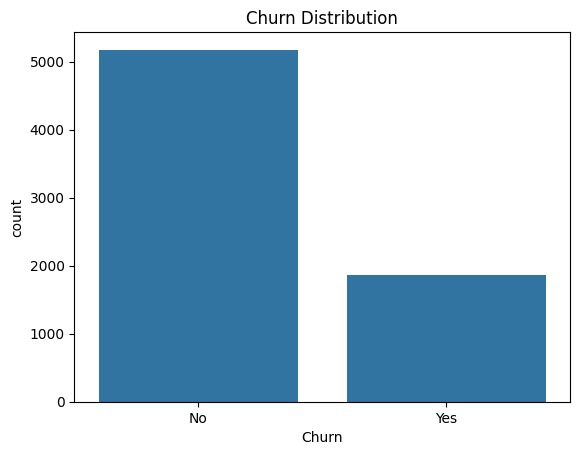

In [25]:
#Data Visualization
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [26]:
#Feature Engineering
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [27]:
oe = OrdinalEncoder()

In [28]:
X = oe.fit_transform(X)

In [32]:
# Check for missing or non-numeric values in 'TotalCharges' and 'MonthlyCharges'
print(df[['TotalCharges', 'MonthlyCharges']].info())

# Check for any non-numeric values in 'TotalCharges'
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()])  # This will show rows with non-numeric TotalCharges




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TotalCharges    7043 non-null   object 
 1   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.2+ KB
None
      customerID  Gender  SeniorCitizen Partner Dependents  Tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male 

In [33]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any missing values in 'TotalCharges' and 'MonthlyCharges'
print(df[['TotalCharges', 'MonthlyCharges']].isna().sum())


TotalCharges      11
MonthlyCharges     0
dtype: int64


In [34]:
# Fill missing values in 'TotalCharges' and 'MonthlyCharges' with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)


<ipython-input-34-c22c2e0b5797>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
<ipython-input-34-c22c2e0b5797>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to 'TotalCharges' and 'MonthlyCharges'
df[['TotalCharges', 'MonthlyCharges']] = scaler.fit_transform(df[['TotalCharges', 'MonthlyCharges']])

# Optionally, check the first few rows of the transformed dataset
print(df.head())


   customerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
0          No 

In [36]:
#Splitting the Data into Training and Testing sets
from sklearn.model_selection import train_test_split

# Assume 'Churn' is your target variable, and the rest are features
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
#Encoding
# One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the first few rows of the encoded dataset
print(df_encoded.head())



   SeniorCitizen  Tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1       -1.160323     -0.994242                  False   
1              0      34       -0.259629     -0.173244                  False   
2              0       2       -0.362660     -0.959674                  False   
3              0      45       -0.746535     -0.194766                  False   
4              0       2        0.197365     -0.940470                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  DeviceProtecti

In [39]:
# Define the target and features again after encoding
X = df_encoded.drop(columns=['Churn_Yes'])  # Assuming 'Churn_Yes' is your target variable
y = df_encoded['Churn_Yes']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#Model Selection and Training
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[961  75]
 [209 164]]
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.69      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [41]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.7768903088391905


In [42]:
#Final Model and Predictions
# Train the best model on the full dataset
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_final = best_rf_model.predict(X_test)

# Evaluate the final model
print("Final Model Evaluation:")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Final Model Evaluation:
[[1016   20]
 [ 277   96]]
              precision    recall  f1-score   support

       False       0.79      0.98      0.87      1036
        True       0.83      0.26      0.39       373

    accuracy                           0.79      1409
   macro avg       0.81      0.62      0.63      1409
weighted avg       0.80      0.79      0.75      1409

